<Figure size 800x600 with 0 Axes>

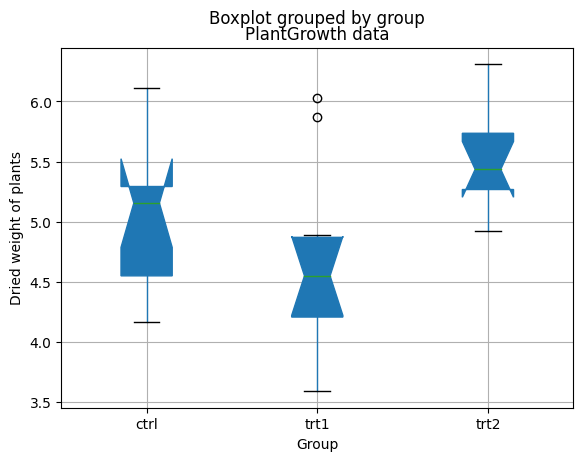

One-way ANOVA result (scipy.stats):
F-statistic: 4.846087862380136
P-value: 0.015909958325622895

One-way ANOVA result (statsmodels):
            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.datasets import get_rdataset
data = get_rdataset('PlantGrowth').data

plt.figure(figsize=(8, 6))
data.boxplot('weight', by='group', notch=True, vert=True, patch_artist=True)
plt.title('PlantGrowth data')
plt.ylabel('Dried weight of plants')
plt.xlabel('Group')
plt.show()

result_scipy = f_oneway(data[data['group'] == 'ctrl']['weight'],
                        data[data['group'] == 'trt1']['weight'],
                        data[data['group'] == 'trt2']['weight'])

print("One-way ANOVA result (scipy.stats):")
print("F-statistic:", result_scipy.statistic)
print("P-value:", result_scipy.pvalue)

model = ols('weight ~ group', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nOne-way ANOVA result (statsmodels):")
print(anova_table)



<Figure size 800x600 with 0 Axes>

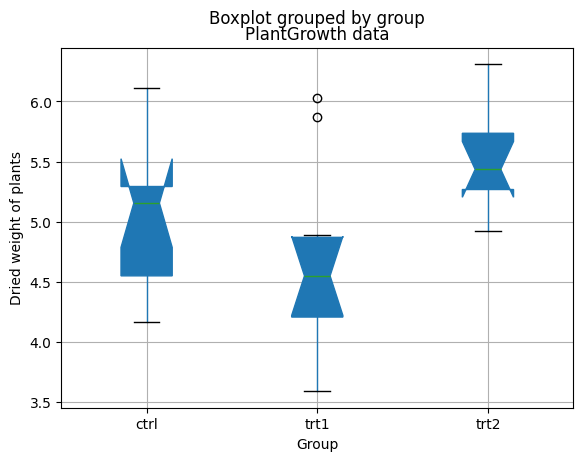

Test for Equality of Variances (Levene's)
Test Statistic: 1.1191856948703909
P-value: 0.3412266241254737

One-way ANOVA result (scipy.stats):
F-statistic: 4.846087862380136
P-value: 0.015909958325622895

One-way ANOVA result (statsmodels):
            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.datasets import get_rdataset
data = get_rdataset('PlantGrowth').data

plt.figure(figsize=(8, 6))
data.boxplot('weight', by='group', notch=True, vert=True, patch_artist=True)
plt.title('PlantGrowth data')
plt.ylabel('Dried weight of plants')
plt.xlabel('Group')
plt.show()

levene_result = levene(data[data['group'] == 'ctrl']['weight'],
                       data[data['group'] == 'trt1']['weight'],
                       data[data['group'] == 'trt2']['weight'])

print("Test for Equality of Variances (Levene's)")
print("Test Statistic:", levene_result.statistic)
print("P-value:", levene_result.pvalue)

result_scipy = f_oneway(data[data['group'] == 'ctrl']['weight'],
                        data[data['group'] == 'trt1']['weight'],
                        data[data['group'] == 'trt2']['weight'])

print("\nOne-way ANOVA result (scipy.stats):")
print("F-statistic:", result_scipy.statistic)
print("P-value:", result_scipy.pvalue)

model = ols('weight ~ group', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nOne-way ANOVA result (statsmodels):")
print(anova_table)


In [10]:

from statsmodels.datasets import get_rdataset
data = get_rdataset('PlantGrowth').data

print(data)


    weight group
0     4.17  ctrl
1     5.58  ctrl
2     5.18  ctrl
3     6.11  ctrl
4     4.50  ctrl
5     4.61  ctrl
6     5.17  ctrl
7     4.53  ctrl
8     5.33  ctrl
9     5.14  ctrl
10    4.81  trt1
11    4.17  trt1
12    4.41  trt1
13    3.59  trt1
14    5.87  trt1
15    3.83  trt1
16    6.03  trt1
17    4.89  trt1
18    4.32  trt1
19    4.69  trt1
20    6.31  trt2
21    5.12  trt2
22    5.54  trt2
23    5.50  trt2
24    5.37  trt2
25    5.29  trt2
26    4.92  trt2
27    6.15  trt2
28    5.80  trt2
29    5.26  trt2


In [11]:
import pandas as pd

from statsmodels.datasets import get_rdataset
data = get_rdataset('PlantGrowth').data

data.to_csv('PlantGrowth.csv', index=False)
